# Week 1 solutions

## Numpy

## 1. Write a NumPy program to reverse an array (first element becomes last).

In [1]:
import numpy as np

In [2]:
def reverse_array(*x):
    x = np.array(x)
    return np.array(x[::-1])
    

In [3]:
reverse_array(1,2,3,4,5)

array([5, 4, 3, 2, 1])

## 2. Write a NumPy program for finding the determinant of the 3D input matrix.

In [4]:
def det3D(x):
    det = x[0][0]*(x[1][1]*x[2][2] - x[2][1]*x[1][2]) - x[0][1]*(x[1][0]*x[2][2] - x[2][0]*x[1][2]) + x[0][2]*(x[1][0]*x[2][1] - x[2][0]*x[1][1])
    return det

In [5]:
det3D([[1,2,3],[2,4,6],[0,0,1]])

0

## 3. An electric field is given by $\textbf{E} (z,t) = E_0 cos(z-t) \hat{x} + 2E_0 cos(z-t+\frac{\pi}{2}) \hat{y} $ 
A.  Find the magnetic field for $z  \in [0,4\pi]$ and $t \in [0,10]$ with 100 points each.

Assume $E_0 = 1$. Since E is moving along z, $cB = \hat{z} \times E$ and poynting vector $S = \frac{E \times B}{\mu_0}$

In [6]:
c = 3*10**8
u0 = 1.25*10**(-6)

z = np.linspace(0,4*np.pi, 100)   #Dividing z and t axis in 100 equal parts
t = np.linspace(0,10,100)

tv, zv = np.meshgrid(t,z)     

#Assume E0 = 1
Ex = np.cos(zv-tv)
Ey = 2*np.cos(zv-tv + np.pi/2)
Ez = 0*tv

$i^{th}$ row of Ex gives E for all the times at $i^{th}$ value of z. And $j^{th}$ column of Ex gives E for all the z at the $j^{th}$ value of t. Try executing out the values to get a sense of this.

In [7]:
E = np.array([Ex,Ey,Ez]) #creating a 3D array to incorporate all three axis of Electric field
np.shape(E)

(3, 100, 100)

But E here gives Ex for all z and times and then Ey and Ez (see this yourself). For cross product we need the [Ex,Ey,Ez] for all z and time

In [8]:
E = np.swapaxes(E,0, -1) #Swapping axis for cross product
np.shape(E)

(100, 100, 3)

In [9]:
B = np.cross(np.array([0,0,1]),E)/c
np.shape(B)

(100, 100, 3)

In [10]:
B = np.swapaxes(B,0,-1)
np.shape(B)

(3, 100, 100)

In [11]:
B

array([[[-4.08215600e-25, -6.72256135e-10, -1.33765904e-09, ...,
          2.43065822e-09,  3.04424992e-09,  3.62680741e-09],
        [ 8.43949690e-10,  1.72800215e-10, -5.00110850e-10, ...,
          1.62524693e-09,  2.26893610e-09,  2.88949490e-09],
        [ 1.67431991e-09,  1.01507614e-09,  3.45484315e-10, ...,
          7.93684813e-10,  1.45711426e-09,  2.10568935e-09],
        ...,
        [-1.67431991e-09, -2.31649505e-09, -2.93505498e-09, ...,
          3.91182013e-09,  4.43624125e-09,  4.91543769e-09],
        [-8.43949690e-10, -1.50649563e-09, -2.15368380e-09, ...,
          3.19695931e-09,  3.77058061e-09,  4.30576322e-09],
        [-3.67394040e-24, -6.72256135e-10, -1.33765904e-09, ...,
          2.43065822e-09,  3.04424992e-09,  3.62680741e-09]],

       [[ 3.33333333e-09,  3.31634272e-09,  3.26554409e-09, ...,
         -3.10388245e-09, -2.96550952e-09, -2.79690510e-09],
        [ 3.30651604e-09,  3.33221340e-09,  3.32394094e-09, ...,
         -3.23276263e-09, -3.13434098e

In [12]:
print(np.shape(E))
print(np.shape(B))

(100, 100, 3)
(3, 100, 100)


Now for cross product for poynting vector we need E and B both in the original form (E[0] gives E values for x axis for all values of z and t, and similarily for z) i.e.  of shape (100,100,3). So we swap B again :)

In [13]:
B = np.swapaxes(B,0,-1)

In [14]:
S = np.cross(E,B)/u0
np.shape(S)

(100, 100, 3)

In [15]:
S = np.swapaxes(S,0,-1)
np.shape(S)

(3, 100, 100)

In [16]:
S

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.        , -0.        , -0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.        , -0.        , -0.        , ...,  

## Matplotlib


1)

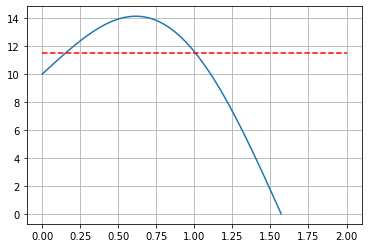

In [17]:
import matplotlib.pyplot as plt


xlist = np.linspace(0, np.pi/2, 100)
def r(t):
  return np.cos(t)*(10*np.sin(t)+np.sqrt(100*((np.sin(t))**2)+100))
ylist=r(xlist)
plt.plot(xlist,ylist)
plt.plot([0,2],[11.5,11.5],'r--')
plt.grid()
plt.show()

From the graph we can see that the intersection points are approximately 0.15 and 1 radians. Thus for $\theta=0.15,1 rad$, we get the desired range $x=11.5m$

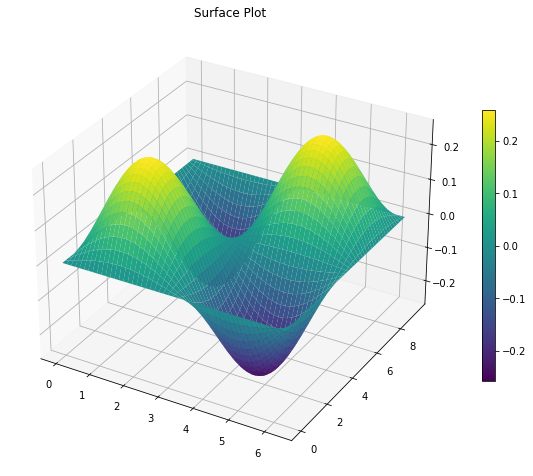

In [18]:
def f(x, y,n1,n2):
  return (2*np.sin(n1*x/2)*np.sin(n2*y/3)/(np.sqrt(6)*np.pi))

xlist = np.linspace(0, 2*np.pi, 100)
ylist = np.linspace(0, 3*np.pi, 100)
X, Y = np.meshgrid(xlist, ylist)

#creating 3D plane
Z = f(X, Y,2,2)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_title('Surface Plot')

#drawing surface plot
surface_plot= ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surface_plot,shrink = 0.5)

plt.show()

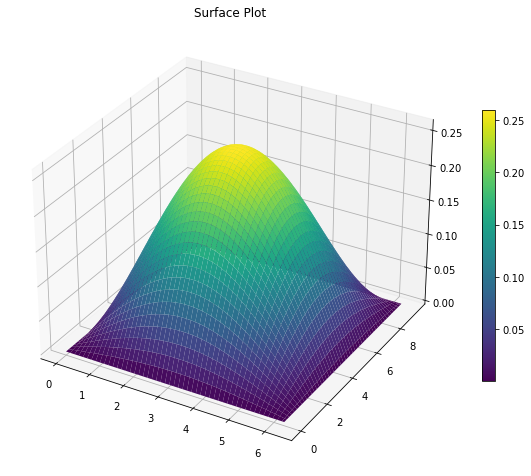

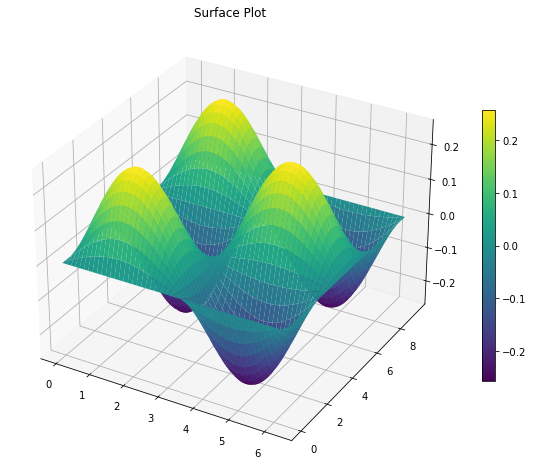

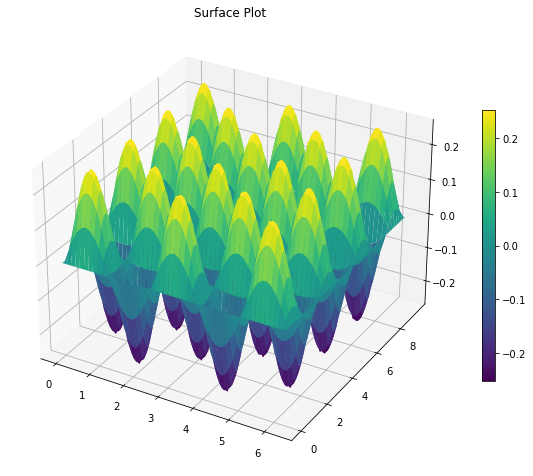

In [19]:
Z = f(X, Y,1,1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_title('Surface Plot')

surface_plot= ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surface_plot,shrink = 0.5)

plt.show()

Z = f(X, Y,2,3)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_title('Surface Plot')

surface_plot= ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surface_plot,shrink = 0.5)

plt.show()

Z = f(X, Y,5,7)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_title('Surface Plot')

surface_plot= ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surface_plot,shrink = 0.5)

plt.show()